In [1]:
from train import train
from visualize import plot_model, plot_models, plot_stats, plot_hist, plot_hists
from distributions import Normal
from mixture_models import MixtureModel
from pprint import pprint

In [2]:
from adversarial_loss import GANLoss, WGANLoss, LSGANLoss

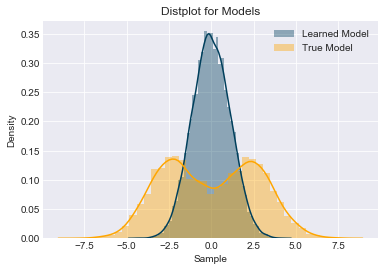

In [3]:
q_model = MixtureModel([Normal([-0.5],[[1.0]]), Normal([0.5],[[1.0]])], [0.5, 0.5])
p_model = MixtureModel([Normal([2.3], [[2.2]]), Normal([-2.3], [[2.2]])], [0.5, 0.5])

plot_models(p_model, q_model)

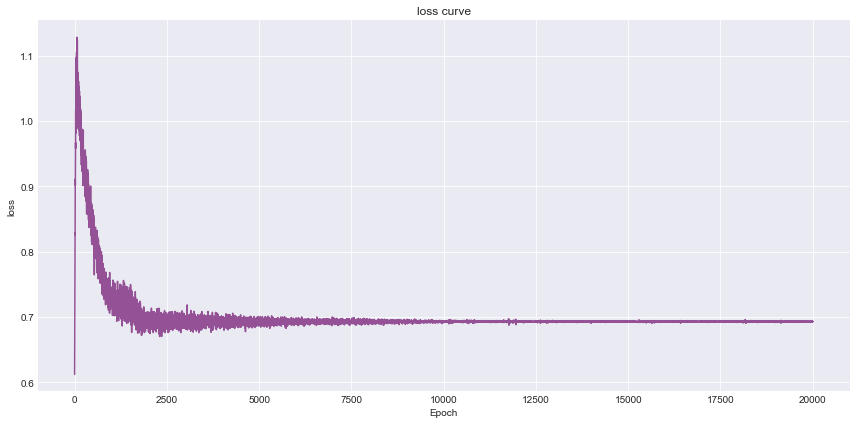

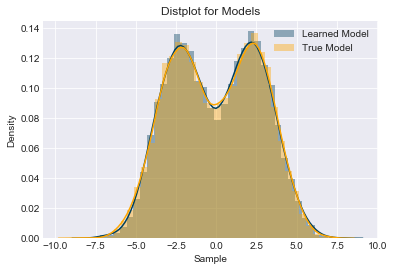

In [4]:
q_model = MixtureModel([Normal([-0.5],[[1.0]]), Normal([0.5],[[1.0]])], [0.5, 0.5])
p_model = MixtureModel([Normal([2.3], [[2.2]]), Normal([-2.3], [[2.2]])], [0.5, 0.5])


stats = train(p_model, q_model, GANLoss(p_model.n_dims), optimizer="RMSprop", 
              epochs=20000, lr=1e-3, batch_size=512)

plot_stats(stats)
plot_models(p_model, q_model)

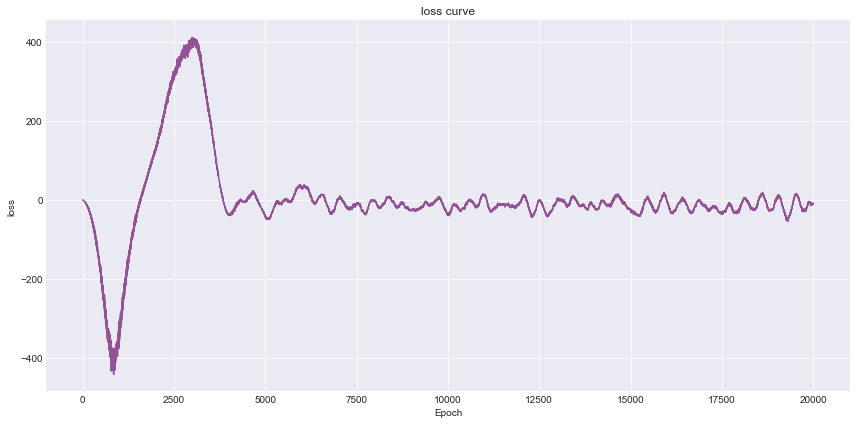

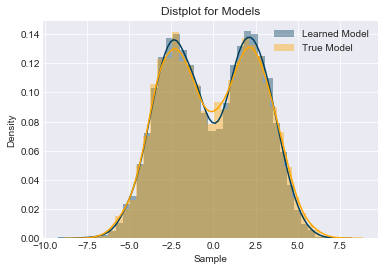

In [5]:
q_model = MixtureModel([Normal([-0.5],[[1.0]]), Normal([0.5],[[1.0]])], [0.5, 0.5])
p_model = MixtureModel([Normal([2.3], [[2.2]]), Normal([-2.3], [[2.2]])], [0.5, 0.5])


stats = train(p_model, q_model, WGANLoss(p_model.n_dims), optimizer="RMSprop", 
              epochs=20000, lr=1e-3, batch_size=512)

plot_stats(stats)
plot_models(p_model, q_model)

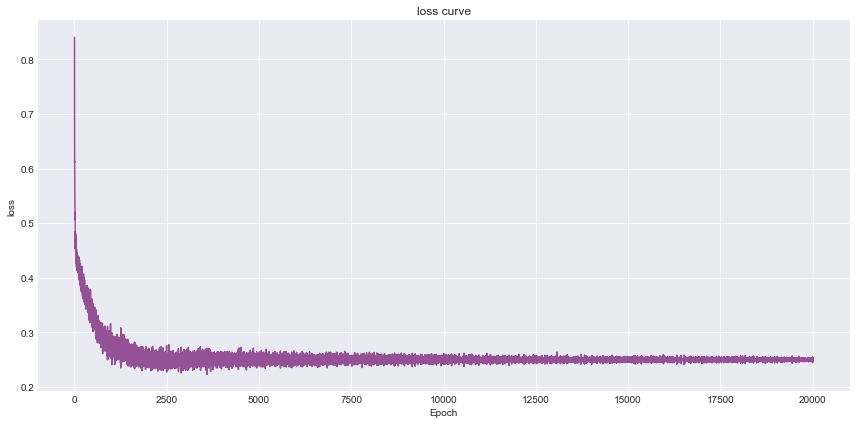

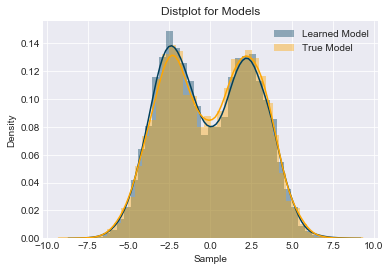

In [3]:
q_model = MixtureModel([Normal([-0.5],[[1.0]]), Normal([0.5],[[1.0]])], [0.5, 0.5])
p_model = MixtureModel([Normal([2.3], [[2.2]]), Normal([-2.3], [[2.2]])], [0.5, 0.5])


stats = train(p_model, q_model, LSGANLoss(p_model.n_dims), optimizer="RMSprop", 
              epochs=20000, lr=1e-3, batch_size=512)

plot_stats(stats)
plot_models(p_model, q_model)